EJERCICIO 1: CLASIFICACIÓN DE TRÁFICO DE RED (benigno, portscan, ddos)

   packets_per_sec  avg_bytes_per_packet  burstiness  label label_name
0       574.540119             91.345377    0.261169      1   portscan
1      1150.714306            475.083705    0.398238      0     benign
2       931.993942            482.508097    0.271263      0     benign
3       798.658484            559.943921    0.160878      0     benign
4       356.018640            630.873067    0.200795      0     benign

Distribución de clases:
label_name
benign      181
portscan     67
ddos         52
Name: count, dtype: int64

Train: (240, 3), Test: (60, 3)


RESULTADOS EJERCICIO 1: TRÁFICO DE RED

Regresión Logística:
  Mejores parámetros: {'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}
  Accuracy:  0.8000
  Precision: 0.7308
  Recall:    0.7917
  F1-Score:  0.7600

kNN:
  Mejores parámetros: {'knn__n_neighbors': 5}
  Accuracy:  0.9500
  Precision: 0.9565
  Recall:    0.9167
  F1-Score:  0.9362


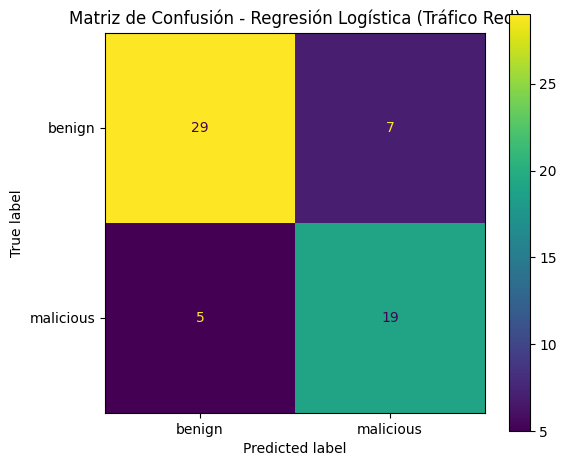



EJERCICIO 2: CLASIFICACIÓN DE FRUTAS (manzana, pera, naranja, limón)

   tipofruta        masa   anchura    altura   nombre
0          1  181.236204  8.426071  7.231994  manzana
1          1  187.959755  7.234028  6.655995  manzana
2          1  171.742508  8.299264  7.101115  manzana
3          1  191.242177  7.030877  7.469910  manzana
4          1  194.973279  7.318509  6.681825  manzana

Distribución:
nombre
manzana    15
pera       15
naranja    15
limon      14
Name: count, dtype: int64

Train: (41, 3), Test: (18, 3)


RESULTADOS EJERCICIO 2: FRUTAS

Regresión Logística:
  Mejores parámetros: {'lr__C': 10, 'lr__solver': 'lbfgs'}
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

kNN:
  Mejores parámetros: {'knn__n_neighbors': np.int64(1)}
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

SVM:
  Mejores parámetros: {'svc__C': 1, 'svc__kernel': 'poly'}
  Accuracy:  0.9444
  Precision: 0.9537
  Recall:    0.9444
  F1-Sco

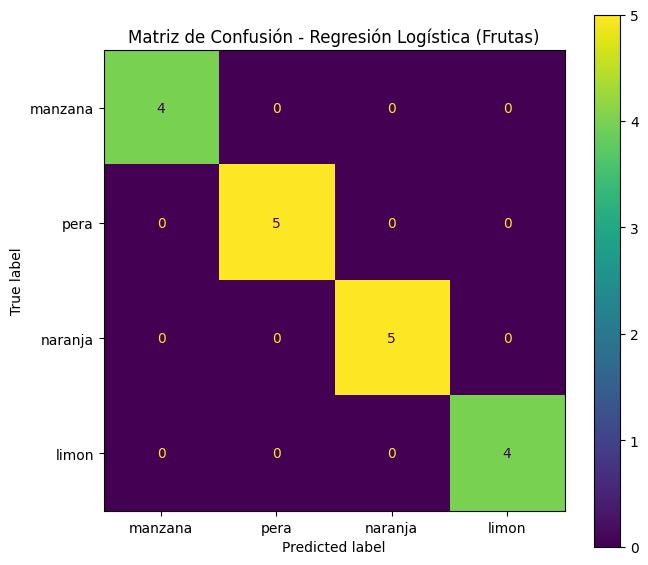

In [2]:
# ============================================================================
# REGRESIÓN LOGÍSTICA: Comparativa con kNN y SVM
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay)
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# ----------------------------------------------------------------------------
# EJERCICIO 1: CLASIFICACIÓN DE TRÁFICO DE RED
# ----------------------------------------------------------------------------

print("="*80)
print("EJERCICIO 1: CLASIFICACIÓN DE TRÁFICO DE RED (benigno, portscan, ddos)")
print("="*80 + "\n")

# Datos simulados (reemplaza con tu CSV real)
np.random.seed(42)
data_red = {
    'packets_per_sec': np.random.uniform(200, 1200, 300),
    'avg_bytes_per_packet': np.random.uniform(50, 850, 300),
    'burstiness': np.random.uniform(0.05, 1.3, 300)
}

# Crear etiquetas simuladas
labels_red = []
for i in range(300):
    if data_red['packets_per_sec'][i] > 800 and data_red['burstiness'][i] > 0.7:
        labels_red.append(2)  # ddos
    elif data_red['packets_per_sec'][i] > 500 and data_red['avg_bytes_per_packet'][i] < 400:
        labels_red.append(1)  # portscan
    else:
        labels_red.append(0)  # benigno

df_red = pd.DataFrame(data_red)
df_red['label'] = labels_red
df_red['label_name'] = df_red['label'].map({0: 'benign', 1: 'portscan', 2: 'ddos'})

print(df_red.head())
print(f"\nDistribución de clases:\n{df_red['label_name'].value_counts()}\n")

# Preparar datos
X_red = df_red[['packets_per_sec', 'avg_bytes_per_packet', 'burstiness']].values
y_red = df_red['label'].values

# Binarizar para comparación (malicioso vs benigno)
y_red_bin = (y_red != 0).astype(int)

# Split train/test
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_red, y_red_bin, test_size=0.2, random_state=42, stratify=y_red_bin
)

print(f"Train: {X_train_red.shape}, Test: {X_test_red.shape}\n")

# ----------------------------------------------------------------------------
# MODELOS PARA EJERCICIO 1
# ----------------------------------------------------------------------------

# 1. REGRESIÓN LOGÍSTICA
pipe_lr_red = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])

param_grid_lr = {
    'lr__C': [0.01, 0.1, 1, 10, 100],
    'lr__penalty': ['l1', 'l2'],
    'lr__solver': ['liblinear']
}

grid_lr_red = GridSearchCV(
    pipe_lr_red, param_grid_lr, cv=5, scoring='f1', n_jobs=-1
)
grid_lr_red.fit(X_train_red, y_train_red)

# 2. kNN
pipe_knn_red = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {'knn__n_neighbors': [1, 3, 5, 7, 9, 11]}
grid_knn_red = GridSearchCV(pipe_knn_red, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn_red.fit(X_train_red, y_train_red)

# 3. SVM
pipe_svm_red = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, random_state=42))
])

param_grid_svm = {
    'svc__kernel': ['linear', 'rbf'],
    'svc__C': [0.1, 1, 10, 100]
}
grid_svm_red = GridSearchCV(pipe_svm_red, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm_red.fit(X_train_red, y_train_red)

# ----------------------------------------------------------------------------
# RESULTADOS EJERCICIO 1
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("RESULTADOS EJERCICIO 1: TRÁFICO DE RED")
print("="*80)

resultados_red = []

for nombre, modelo in [('Regresión Logística', grid_lr_red),
                        ('kNN', grid_knn_red),
                        ('SVM', grid_svm_red)]:
    y_pred = modelo.predict(X_test_red)

    acc = accuracy_score(y_test_red, y_pred)
    prec = precision_score(y_test_red, y_pred, zero_division=0)
    rec = recall_score(y_test_red, y_pred)
    f1 = f1_score(y_test_red, y_pred)

    resultados_red.append({
        'Modelo': nombre,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Mejores Parámetros': modelo.best_params_
    })

    print(f"\n{nombre}:")
    print(f"  Mejores parámetros: {modelo.best_params_}")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

# Tabla comparativa
df_resultados_red = pd.DataFrame(resultados_red)
print("\n" + "="*80)
print("TABLA COMPARATIVA - EJERCICIO 1")
print("="*80)
print(df_resultados_red.to_string(index=False))

# Matriz de confusión para Regresión Logística
y_pred_lr_red = grid_lr_red.predict(X_test_red)
cm_lr_red = confusion_matrix(y_test_red, y_pred_lr_red)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ConfusionMatrixDisplay(cm_lr_red, display_labels=['benign', 'malicious']).plot(ax=ax)
ax.set_title('Matriz de Confusión - Regresión Logística (Tráfico Red)')
plt.tight_layout()
plt.show()


# ----------------------------------------------------------------------------
# EJERCICIO 2: CLASIFICACIÓN DE FRUTAS
# ----------------------------------------------------------------------------

print("\n\n" + "="*80)
print("EJERCICIO 2: CLASIFICACIÓN DE FRUTAS (manzana, pera, naranja, limón)")
print("="*80 + "\n")

# Datos simulados (reemplaza con tu archivo Basefrutas.txt)
np.random.seed(42)
frutas_data = []

# Manzanas
for _ in range(15):
    frutas_data.append([1, np.random.uniform(170, 200), np.random.uniform(7.0, 8.5),
                        np.random.uniform(6.5, 7.5)])
# Peras
for _ in range(15):
    frutas_data.append([2, np.random.uniform(80, 90), np.random.uniform(5.8, 6.5),
                        np.random.uniform(4.0, 5.0)])
# Naranjas
for _ in range(15):
    frutas_data.append([3, np.random.uniform(130, 170), np.random.uniform(6.5, 7.5),
                        np.random.uniform(6.5, 7.5)])
# Limones
for _ in range(14):
    frutas_data.append([4, np.random.uniform(90, 110), np.random.uniform(6.0, 7.0),
                        np.random.uniform(4.5, 5.5)])

df_frutas = pd.DataFrame(frutas_data, columns=['tipofruta', 'masa', 'anchura', 'altura'])

nombre_map = {1: 'manzana', 2: 'pera', 3: 'naranja', 4: 'limon'}
df_frutas['nombre'] = df_frutas['tipofruta'].map(nombre_map)

print(df_frutas.head())
print(f"\nDistribución:\n{df_frutas['nombre'].value_counts()}\n")

# Preparar datos
X_frutas = df_frutas[['masa', 'anchura', 'altura']].values
y_frutas = df_frutas['tipofruta'].values

X_train_frutas, X_test_frutas, y_train_frutas, y_test_frutas = train_test_split(
    X_frutas, y_frutas, test_size=0.30, random_state=42, stratify=y_frutas
)

print(f"Train: {X_train_frutas.shape}, Test: {X_test_frutas.shape}\n")

# ----------------------------------------------------------------------------
# MODELOS PARA EJERCICIO 2
# ----------------------------------------------------------------------------

# 1. REGRESIÓN LOGÍSTICA
pipe_lr_frutas = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial'))
])

param_grid_lr_frutas = {
    'lr__C': [0.01, 0.1, 1, 10, 100],
    'lr__solver': ['lbfgs', 'saga']
}

grid_lr_frutas = GridSearchCV(pipe_lr_frutas, param_grid_lr_frutas, cv=3,
                               scoring='accuracy', n_jobs=-1)
grid_lr_frutas.fit(X_train_frutas, y_train_frutas)

# 2. kNN
pipe_knn_frutas = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

neighbors = np.arange(1, 11)
param_grid_knn_frutas = {'knn__n_neighbors': neighbors}
grid_knn_frutas = GridSearchCV(pipe_knn_frutas, param_grid_knn_frutas, cv=3,
                                scoring='accuracy', n_jobs=-1)
grid_knn_frutas.fit(X_train_frutas, y_train_frutas)

# 3. SVM
pipe_svm_frutas = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42))
])

param_grid_svm_frutas = {
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__C': [0.1, 1, 10]
}
grid_svm_frutas = GridSearchCV(pipe_svm_frutas, param_grid_svm_frutas, cv=3,
                                scoring='accuracy', n_jobs=-1)
grid_svm_frutas.fit(X_train_frutas, y_train_frutas)

# ----------------------------------------------------------------------------
# RESULTADOS EJERCICIO 2
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("RESULTADOS EJERCICIO 2: FRUTAS")
print("="*80)

resultados_frutas = []

for nombre, modelo in [('Regresión Logística', grid_lr_frutas),
                        ('kNN', grid_knn_frutas),
                        ('SVM', grid_svm_frutas)]:
    y_pred = modelo.predict(X_test_frutas)

    acc = accuracy_score(y_test_frutas, y_pred)
    prec = precision_score(y_test_frutas, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test_frutas, y_pred, average='weighted')
    f1 = f1_score(y_test_frutas, y_pred, average='weighted')

    resultados_frutas.append({
        'Modelo': nombre,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Mejores Parámetros': modelo.best_params_
    })

    print(f"\n{nombre}:")
    print(f"  Mejores parámetros: {modelo.best_params_}")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

# Tabla comparativa
df_resultados_frutas = pd.DataFrame(resultados_frutas)
print("\n" + "="*80)
print("TABLA COMPARATIVA - EJERCICIO 2")
print("="*80)
print(df_resultados_frutas.to_string(index=False))

# Matriz de confusión para Regresión Logística
y_pred_lr_frutas = grid_lr_frutas.predict(X_test_frutas)
cm_lr_frutas = confusion_matrix(y_test_frutas, y_pred_lr_frutas)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ConfusionMatrixDisplay(cm_lr_frutas,
                       display_labels=['manzana', 'pera', 'naranja', 'limon']).plot(ax=ax)
ax.set_title('Matriz de Confusión - Regresión Logística (Frutas)')
plt.tight_layout()
plt.show()


# ----------------------------------------------------------------------------
#
